# Árboles de Decisiones: Ejercicios
### Daniel Marín López

# Árboles de decisión 1

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as Metrics
import kagglehub
import graphviz
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from IPython.display import Image

In [ ]:
SEED = 42
TEST = 0.2

### **1. Entrenamiento de un árbol de decisión básico**

Utiliza el dataset Iris de Scikit-Learn para entrenar un árbol de decisión que clasifique flores según su especie. Visualiza el árbol utilizando graphviz y explica las decisiones que toma en cada nodo.

Cargamos los datos y los pasamos a un Dataframe.

In [ ]:
data_iris = sklearn.datasets.load_iris()
target_names = data_iris.target_names
data_iris = pd.DataFrame(data= np.c_[data_iris['data'], data_iris['target']],
                     columns= data_iris['feature_names'] + ['target'])
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Creamos los datos de entrenamiento (el 80%) y prueba (el 20%) y entrenamos un modelo básico de árbol de decisión.

In [ ]:
X = data_iris.drop('target', axis=1)
y = data_iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

In [ ]:
iris_tree_model = tree.DecisionTreeClassifier()
iris_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Comprobamos los resultados y hacemos la matriz de confusión.

In [ ]:
y_pred = iris_tree_model.predict(X_test)

print(Metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



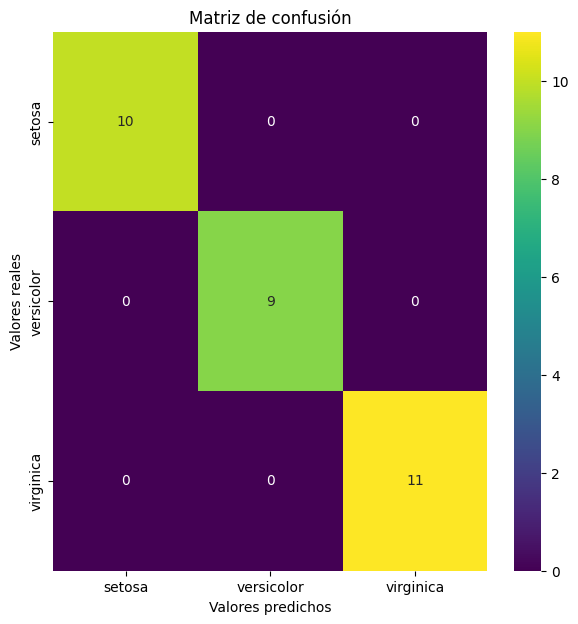

In [ ]:
cm = Metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=target_names, index=target_names)
plt.figure(figsize=(7, 7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="viridis")
plt.title('Matriz de confusión')
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.show()

Luego mostramos las decisiones que ha tomado el árbol.

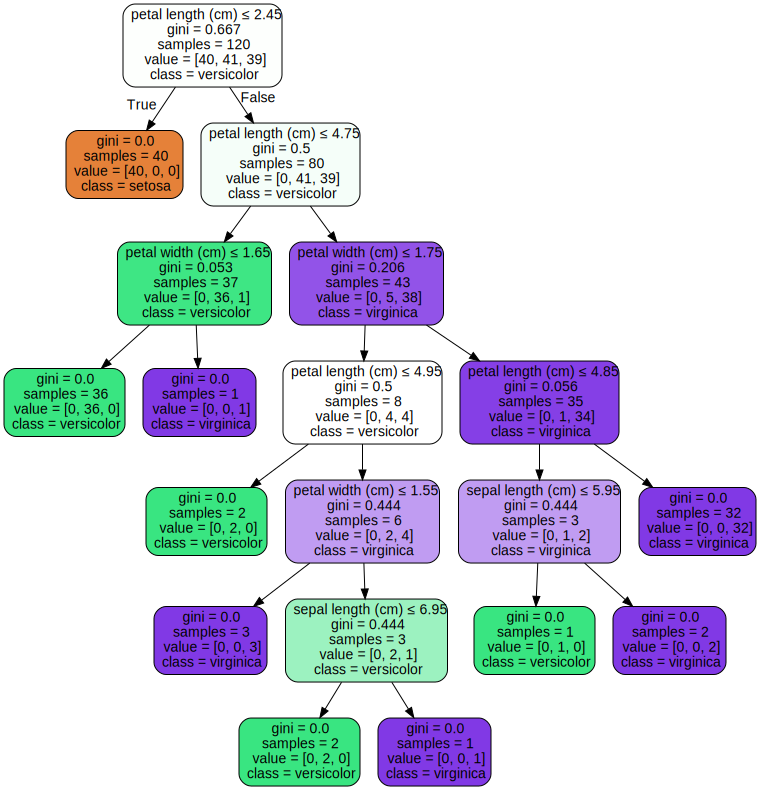

In [ ]:
iris_graph = tree.export_graphviz(iris_tree_model, out_file=None,
                                 feature_names=X_train.columns,
                                 class_names=target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph = graphviz.Source(iris_graph)
display(graph)

Tenemos que tener en cuenta que un árbol escoge las características que realizan una división más pura (o impura) dependiendo de estos criterios:

* Gini: Minimiza la probabilidad de clasificación incorrecta.
* Entropía: Maximiza la ganancia de información.
* MSE (Error Cuadrático Medio): Para regresión, minimiza la varianza de las hojas

El árbol toma las siguientes decisiones:

**1. Nodo raíz:**
* La primera decisión se basa en si el **longitud del pétalo** es menor o igual a 2.45 cm.
* Si es **verdadero** (≤ 2.45 cm), todas las muestras pertenecen a la clase **setosa**.
* Si es falso (> 2.45 cm), el árbol sigue dividiendo los datos en función de la misma característica.

**2. Si longitud del pétalo > 2.45 cm**
* Se evalúa si la **longitud del pétalo** es menor o igual a 4.75 cm.
* Si es **verdadero** (≤ 4.75 cm), hay una mezcla de clases **versicolor** y **virginica**, y el árbol sigue dividiendo.

**3. División dentro del grupo de longitud del pétalo ≤ 4.75 cm:**
* Si el **ancho del pétalo** es menor o igual a 1.65 cm, casi todas las muestras pertenecen a la clase **versicolor**.
* Si el **ancho del pétalo** es mayor, el árbol sigue dividiendo basándose en otros parámetros.

**4. División dentro del grupo de longitud del pétalo > 4.75 cm:**
* Se observa que si la **longitud del pétalo** es menor o igual a 4.85 cm, la mayoría de los datos pertenecen a la clase **virginica**, por lo que el árbol decide sobre esta clase.
* Si no, se **siguen evaluando** otras **características** para afinar la clasificación.

### **2. Parámetros principales del árbol.**

Experimenta con los parámetros `max_depth`, `min_samples_split` y `min_samples_leaf`. Observa cómo cambian el tamaño del árbol y su precisión en el conjunto de entrenamiento y prueba. Usa **validación cruzada** para encontrar los mejores valores.

Usaremos `GridSearchCV` para explorar varias combinaciones a la vez y elegir la configuración óptima mediante validación cruzada.

In [ ]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Precisión de validación:", grid.best_score_)
print("Precisión en prueba:", grid.score(X_test, y_test))

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión de validación: 0.95
Precisión en prueba: 1.0


En estos gráficos podemos ver que los mejores hiperparámetros son los siguientes:
* **Max Depth**: Ninguna
* **Min Samples Split**: 4
* **Min Samples Leaf**: 2

In [ ]:
iris_tree_model2 = tree.DecisionTreeClassifier(min_samples_split=4, min_samples_leaf=2)
iris_tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=4)

Realizamos las metricas, aunque no se diferencian nada.

In [ ]:
y_pred2 = iris_tree_model2.predict(X_test)

print(Metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



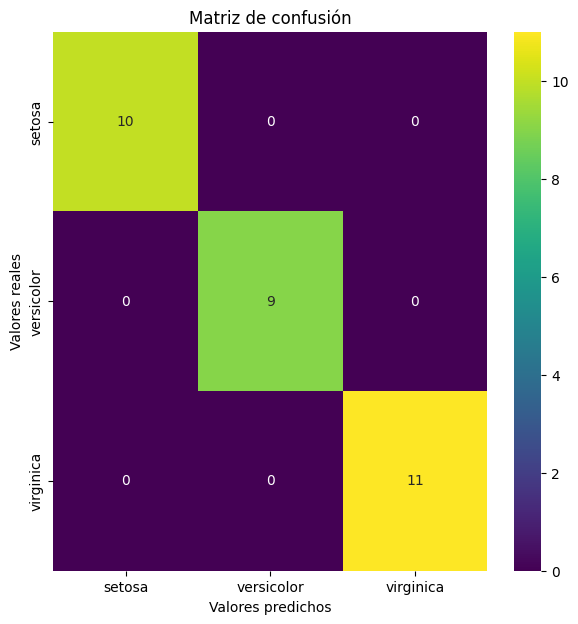

In [ ]:
cm2 = Metrics.confusion_matrix(y_test, y_pred2)
df_cm2 = pd.DataFrame(cm2, columns=target_names, index=target_names)
plt.figure(figsize=(7, 7))
sns.heatmap(df_cm2, annot=True, fmt='g', cmap="viridis")
plt.title('Matriz de confusión')
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.show()

Como hemos cambiado la profundidad, nuestro árbol es más corto. Anteriormente se intuye que el árbol original tiene 8 de profundidad y ahora solo llega hasta 6. El número mínimo de muestras necesarias para estar en un nodo de hoja pasa a ser de 3 mientras que por defecto era de 1. El número mínimo de muestras necesarias para dividir un nodo interno es 2 por defecto por lo que no ha habido cambios en esa parte.

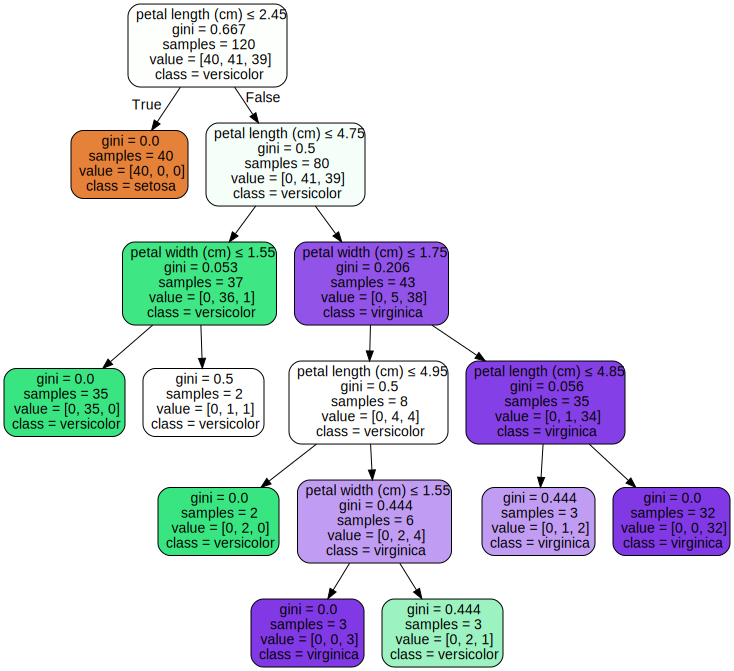

In [ ]:
iris_graph2 = tree.export_graphviz(iris_tree_model2, out_file=None,
                                 feature_names=X_train.columns,
                                 class_names=target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph2 = graphviz.Source(iris_graph2)
display(graph2)

### **3. Importancia de las características**

Entrena un árbol de decisión utilizando el dataset Wine de Scikit-Learn. Calcula la importancia de las características y crea un gráfico de barras que las visualice. Discute qué características son más relevantes y por qué.

Cargamos los datos del vino y entrenamos un modelo de árbol.

In [ ]:
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

!mv /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2/winequality-red.csv /content/winequality-red.csv

100%|██████████| 25.6k/25.6k [00:00<00:00, 29.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2


In [ ]:
data_wine = pd.read_csv("/content/winequality-red.csv")
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
X_wine = data_wine.drop('quality', axis=1)
y_wine = data_wine['quality']

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=TEST, random_state=SEED)

In [ ]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=SEED), param_grid, cv=5)
grid.fit(X_train_wine, y_train_wine)

print("Mejores parámetros:", grid.best_params_)
print("Precisión de validación:", grid.best_score_)
print("Precisión en prueba:", grid.score(X_test_wine, y_test_wine))

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión de validación: 0.6012714460784314
Precisión en prueba: 0.559375


In [ ]:
tree_wine = tree.DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_depth=None)
tree_wine.fit(X_train_wine, y_train_wine)

DecisionTreeClassifier()

In [ ]:
y_pred_wine = tree_wine.predict(X_test_wine)
print(Metrics.classification_report(y_test_wine, y_pred_wine))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.10      0.10        10
           5       0.64      0.70      0.67       130
           6       0.57      0.52      0.55       132
           7       0.48      0.48      0.48        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.57      0.56       320



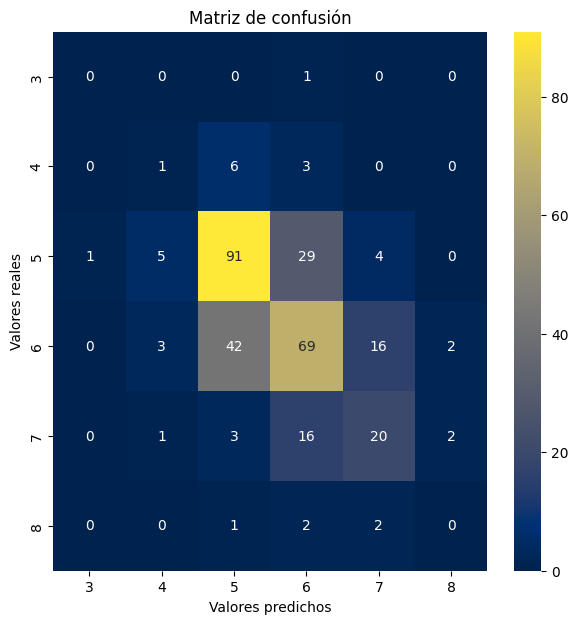

In [ ]:
cm_wine = Metrics.confusion_matrix(y_test_wine, y_pred_wine)
DF_COLUMNS = sorted(data_wine['quality'].unique())

plt.figure(figsize=(7, 7))
sns.heatmap(cm_wine, annot=True, fmt='g', cmap="cividis", xticklabels=DF_COLUMNS, yticklabels=DF_COLUMNS)
plt.title('Matriz de confusión')
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.show()

In [ ]:
tree_graph_wine = tree.export_graphviz(tree_wine,
                                       feature_names=data_wine.drop('quality', axis=1).columns,
                                       class_names=[str(x) for x in data_wine['quality'].unique()], # Convert class names to strings
                                       filled=True, rounded=True,
                                       special_characters=True)

with open("wine.dot", "w") as f:
    f.write(tree_graph_wine)

!dot -Tjpg wine.dot -o wine.jpg
Image('wine.jpg')

Output hidden; open in https://colab.research.google.com to view.

Una vez tenemos el modelo del árbol, vamos a calcular la importancia de las características que le ha dado nuestro modelo.

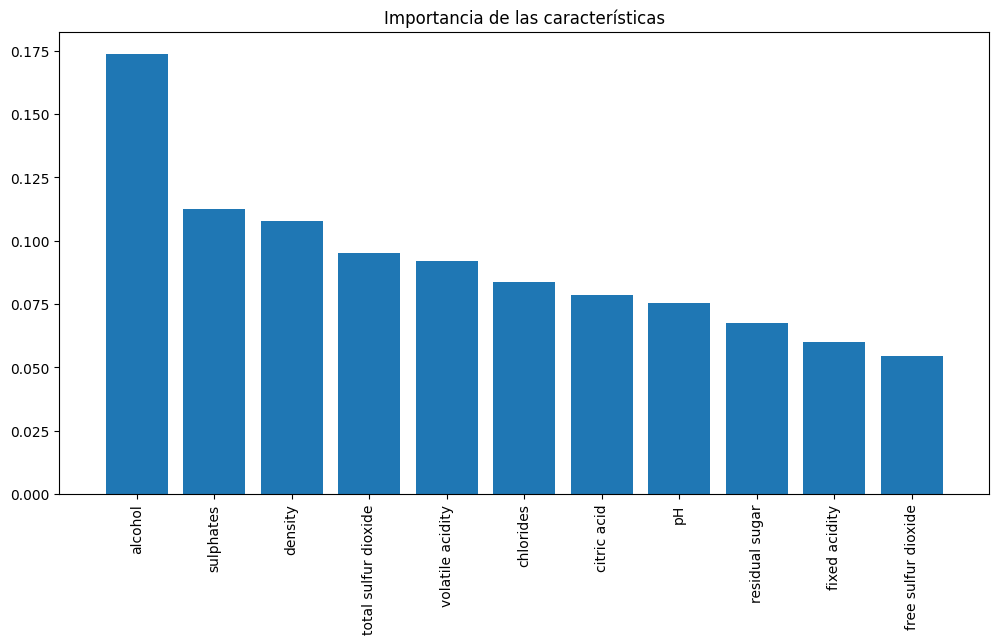

In [ ]:
importances = tree_wine.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Importancia de las características")
plt.bar(range(X_wine.shape[1]), importances[indices], align="center")
plt.xticks(range(X_wine.shape[1]), X_wine.columns[indices], rotation=90)
plt.xlim([-1, X_wine.shape[1]])
plt.show()


El gráfico muestra que las características más importantes son *alcohol*, *volatile acidity* y *sulphates*. Esto es debido a que elementos como el alcohol influyen en muchos aspectos del vino como su estructura, aromas, sabor entre muchos otros.

Además, no he decidido escalar los datos como en el antrior porque a parte de que los resultados son mejores estas técnicas afectan en la importancia de las características.

### **4. Clasificación binaria**

Usa el dataset breast_cancer de Scikit-Learn para entrenar un árbol de decisión que clasifique tumores como benignos o malignos. Evalúa el modelo utilizando una matriz de confusión.

In [ ]:
data_cancer = sklearn.datasets.load_breast_cancer()
target_names = data_cancer.target_names
data_cancer = pd.DataFrame(data= np.c_[data_cancer['data'], data_cancer['target']],
                     columns= list(data_cancer['feature_names']) + ['target'])
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X_cancer = data_cancer.drop('target', axis=1)
y_cancer = data_cancer['target']

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=SEED)

In [ ]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train_cancer, y_train_cancer)

print("Mejores parámetros:", grid.best_params_)
print("Precisión de validación:", grid.best_score_)
print("Precisión en prueba:", grid.score(X_test_cancer, y_test_cancer))

Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión de validación: 0.9318681318681319
Precisión en prueba: 0.9473684210526315


In [ ]:
tree_cancer = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
tree_cancer.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_cancer = tree_cancer.predict(X_test_cancer)
print(Metrics.classification_report(y_test_cancer, y_pred_cancer))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        43
         1.0       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



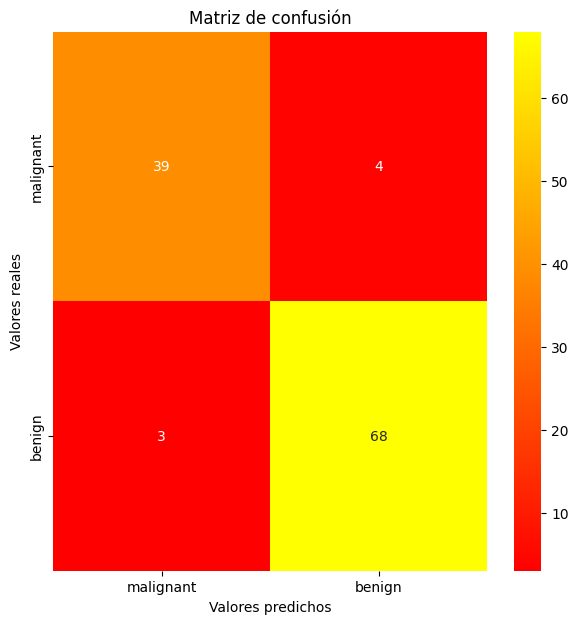

In [ ]:
cm_cancer = Metrics.confusion_matrix(y_test_cancer, y_pred_cancer)
df_cm_cancer = pd.DataFrame(cm_cancer, columns=target_names, index=target_names)
plt.figure(figsize=(7, 7))
plt.title('Matriz de confusión')
sns.heatmap(df_cm_cancer, annot=True, fmt='g', cmap="autumn")
plt.ylabel('Valores reales')
plt.xlabel('Valores predichos')
plt.show()

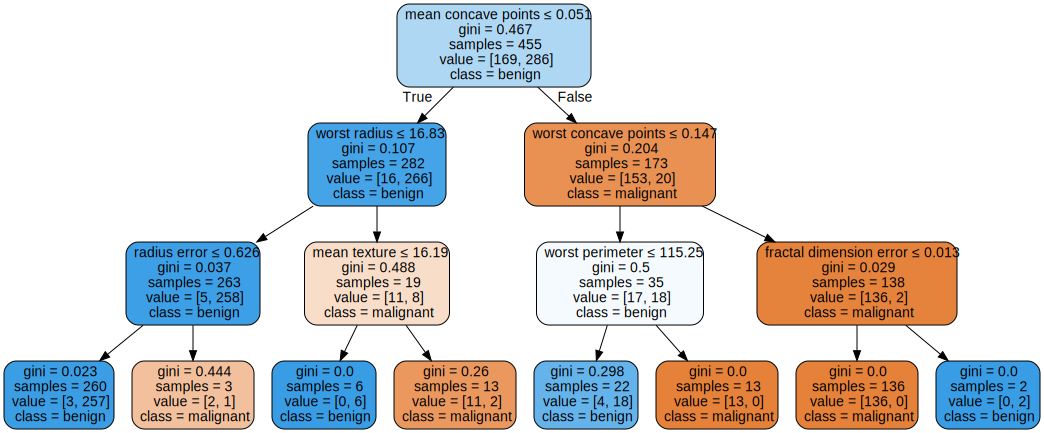

In [ ]:
tree_graph_cancer = tree.export_graphviz(tree_cancer, out_file=None,
                                       feature_names=data_cancer.drop('target', axis=1).columns,
                                       class_names=target_names,
                                       filled=True, rounded=True,
                                       special_characters=True)
graph_cancer = graphviz.Source(tree_graph_cancer)
display(graph_cancer)